<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%97%90%EC%84%9C_%EA%B2%B0%EC%B8%A1%EC%B9%98(missing_values)%2C_%EC%9D%B4%EC%83%81%EC%B9%98(outliers)_%EC%8B%9D%EB%B3%84_%EB%B0%8F_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 결측치 여부
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [ ]:
# 원본데이터를 보존하기 위해서 복사
df1 = df.copy()
# df1['VIP'] = True
df1.insert(5,'VIP','True')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,VIP,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,True,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,True,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,True,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,True,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1[df1['Pclass'] == 1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [ ]:
df1.insert(5,'RICH',df1['Fare'] > 95)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,RICH,VIP,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,False,True,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,False,True,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,False,True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,False,True,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,False,True,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 결측치 제거 대상 컬럼 :
temp1 = df1.isna().mean()
temp1 = temp1[ temp1 > 0 ]

temp2 = df1.isna().sum()
temp2 = temp2[ temp2 > 0 ]

temp = pd.concat([temp1,temp2],axis=1)
temp.columns = ['결측치비율','결측치개수']
temp
# 제거? drop
# Age 대체? : 평균값,중앙값,그룹별 평균,앞뒤 데이터와 같은값, 별도의 머신러닝으로 예측(추론)  , 확실히 없는 값이면 0으로
# Cabin : 삭제또는  unknown, 선실유무(0/1)
# Embarked : 빈도수

,결측치비율,결측치개수
Age,0.198653,177
Cabin,0.771044,687
Embarked,0.002245,2


```
df.apply(func, axis= 0) 컬럼 기준으로 함수 적용
df.apply(func, axis= 1) 행 기준으로 함수 적용
```

In [ ]:
df2 = df.copy()
df2['Survived2'] = df2['Survived'].apply(lambda x : '사망' if x == 0 else '생존')
# 연속된 수치형 데이터를 범주형
df2['age_group1'] = df2['Age'].apply(lambda x : '미성년' if x < 20 else '성년')
df2['age_group2'] = df2['Age'].apply(lambda x : 'child' if x < 18 else ( 'adult' if x <= 60 else 'senior'))
# 실제 데이터 분포를 기준으로 범주  cut
df2['Age_realGoup'] = pd.cut(df2['Age'], bins = [0,18,60,100], labels = ['child','adult','senior'])
# 가족수
df2['family'] = df.apply(lambda x : x['SibSp'] + x['Parch'] + 1 , axis = 1)
df2.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived2,age_group1,age_group2,Age_realGoup,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,사망,성년,adult,adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,생존,성년,adult,adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,생존,성년,adult,adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,생존,성년,adult,adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,사망,성년,adult,adult,1


In [ ]:

# Age를 중앙값으로 대처
df1['Age'].fillna(df1['Age'].median(),inplace=True)
#  Age를 pclass의 평균으로 대처  group by, apply 기능을 기용
# Pclass별로 평균을 계산
pclass_mean = df1.groupby('Pclass')['Age'].mean().round(0)
print(pclass_mean)
# 1. apply를 이용해서 Age결측치
df1['Age'] = df1.apply(lambda x : pclass_mean[x['Pclass']] if pd.isna(x['Age']) else x['Age'], axis=1)
# 2. fillna 를 이용해서 Age 결측치
print(df1.groupby('Pclass')['Age'].transform('mean').round(0))
df1['Age'] = df1['Age'].fillna(df1.groupby('Pclass')['Age'].transform('mean').round(0))

Pclass
1    37.0
2    30.0
3    26.0
Name: Age, dtype: float64
0      26.0
1      37.0
2      26.0
3      37.0
4      26.0
       ... 
886    30.0
887    37.0
888    26.0
889    37.0
890    26.0
Name: Age, Length: 891, dtype: float64


<ipython-input-59-6bce32ad42e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].median(),inplace=True)


In [ ]:
# 타이타닉 데ㅐ이터로. 결측치 조사 하고 적당한 방법으로 처리
test_df = df.copy()

# 복습 아래 주석 달린부분을 해결

In [ ]:
# 결측치 확인
# 데이터프레임형태로 보기(결측치 수, 결측치 비율)
# na 처리전략  비율과 데이터 특성에 따라서
#  제거 : 많거나 적은경우
#  대처 : 애매한 경우.  수치형 :평균, 중위수, 그룹별 평균(중위수)
#                        범주형 : 최빈값, unknown, na면 0 그렇지 않으면 1
# 방법 : 그룹별 --> group by / apply  ,  group by transform / fillna
# 데이터분석에서 새로운 특성을 찾아서 생성하는것도 중요
# 가족수, RICH, vip, 연속적인 수치형 데이터를--> 범주형으로 분류  apply / cut


# 이상치 분석
```
일반적인 패턴과 크게 벗어난 값
분석이나 모델 성능에 영향을 준다
1. IQR(사분위 범위)
IQR = Q3 - Q1(75%-25%)
하한 = Q1 - 1.5*IQR
상한 = Q3 + 1.5*IQR

2. 표준편차(Z-score)
평균과 표준편차를 이용
Z-score 값이 +-3이상이면 이상치
Z = (x-평균) / 표준편차

3.시각적인방법 check
boxplot(4분위수를 시각적으로 표현)

```

# Fare 이상치 탐지(IQR)

In [ ]:
df1 = df.copy()
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
# 탐지범위
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
# Fare 기준으로 이상치는 몇개
Fare_outlier_count = df1[ (df1['Fare'] < lower_bound) | (df1['Fare'] > upper_bound) ].shape[0]
print(f'이상치 개수 : {Fare_outlier_count}')
# 이상치 제거
print( f"이상치 제거전 : {df1['Fare'].describe()}"  )
df1 = df1[ (df1['Fare'] >= lower_bound) & (df1['Fare'] <= upper_bound) ]
print(f"이상치 제거후 : {df1['Fare'].describe()}")

-26.724 65.6344
이상치 개수 : 116
이상치 제거전 : count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
이상치 제거후 : count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64


# Fare 이상치 탐지(Z-score)

In [ ]:
from scipy.stats import zscore
df1 = df.copy()
df1['Fare_zscore'] = np.abs(zscore(df1['Fare']))
# 결측치 정의 df1['Fare_zscore'] > 3
print(f"z-score 이상치 개수 : {(df1['Fare_zscore'] > 3).sum()}")

print( f"이상치 제거전 : {df1['Fare'].describe()}"  )
#이상치 제거
df1 = df1[df1['Fare_zscore'] <= 3]
print( f"이상치 제거전 : {df1['Fare'].describe()}"  )

z-score 이상치 개수 : 73
이상치 제거전 : count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
이상치 제거전 : count    818.000000
mean      20.823441
std       18.390114
min        0.000000
25%        7.895800
50%       13.000000
75%       26.550000
max       81.858300
Name: Fare, dtype: float64


# Boxplot

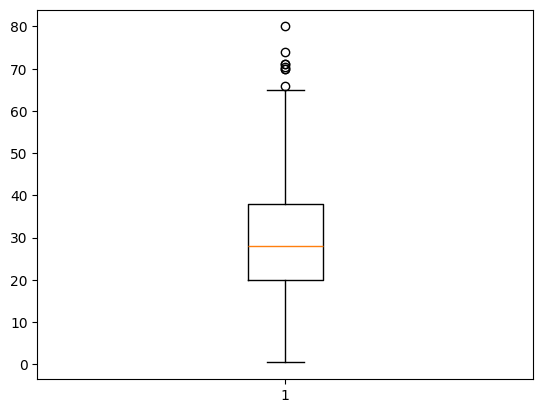

In [ ]:
import matplotlib.pyplot as plt
df1 = df1.dropna(subset=['Age'])
plt.boxplot(df1['Age'])
plt.show()

In [ ]:
df1['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


# EDA

In [ ]:
df1 = df.copy()
df1.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# 이상치 검출 함수
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR =  Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outlier = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  print(f'{column} 이상치 개수 :{len(outlier)}')
  return outlier

for col in ['Age', 'SibSp', 'Parch', 'Fare']:
  detect_outliers(df.copy(), col)

Age 이상치 개수 :11
SibSp 이상치 개수 :46
Parch 이상치 개수 :213
Fare 이상치 개수 :116


In [ ]:
# Fare 상류층반영한 데이터... 유지
# Age 도 생물학적으로 가능
# SibSp ,Parch 가능할 수도.. 유지
df1 = df.copy()
df1['Rich'] = df['Fare'] > 95
df1['Rich'].value_counts()

,count
Rich,
False,838
True,53


In [ ]:
# pclass 1등석  & Rich & Cabin 정보가 --> Vip
df1['Vip'] = (df1['Pclass'] == 1 ) & (df1['Rich'] == True) & (df1['Cabin'].notna())
df1['Vip'].value_counts()

,count
Vip,
False,848
True,43


In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rich,Vip
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False


# 상관관계는 필수관계는 아니다.
```
x가 증가 또는 감소함에 따라서 y도 같은 패턴으로 움직이는것
분석
  숫자형 변수(연속형 변수) : 피어슨 상관계수(Point -Biserial)
  범주형 변수 : 카이제곱 검정(Chi-Square)
```

In [ ]:
# 숫자형 변수와 생존간 상관관계
# 피어슨 상관계수 사용
# pointbiserialr  한변수가 연속형이고 다른변수가 이진형

from scipy.stats import pointbiserialr
df1 = df.copy()
numeric_cols = df1.describe().columns[3:]
for col in numeric_cols:
  corr = df1['Survived'].corr(df1[col])
  print(f'corr : {col}과의 상관계수 : {corr:.3f}')
  corr, p_value =  pointbiserialr(df1['Survived'], df[col])
  print(f'pointbiserialr : {col}과의 상관계수 : {corr:.3f}, p-value : {p_value:.3f}')

# -1 ~ 1  상관지수
# corr > 0 양의 상관관계
# corr < 0 음의 상관관계
# corr = 0 상관 관계 없다

# p_value(유의 확률)
# p < 0.05 : 통계적으로 유의미함 : 변수간의 관계가 우연이 아닐 가능성이 높음
# p > 0.05 : 통계적으로 유의미하지 않음 : 변수간의 관계가 우연일 가능성이 있음
# p = 0.0000x 매우작은 값은 유의미한 상관관계가 있음

corr : Age과의 상관계수 : -0.077
pointbiserialr : Age과의 상관계수 : nan, p-value : nan
corr : SibSp과의 상관계수 : -0.035
pointbiserialr : SibSp과의 상관계수 : -0.035, p-value : 0.292
corr : Parch과의 상관계수 : 0.082
pointbiserialr : Parch과의 상관계수 : 0.082, p-value : 0.015
corr : Fare과의 상관계수 : 0.257
pointbiserialr : Fare과의 상관계수 : 0.257, p-value : 0.000


#

In [ ]:
# 범주형 변수 : 카이제곱 검정(Chi-Square)
# 두 범주형 변수간에 관계가 있는지 확인
# 성별 & 생존여부

import scipy.stats as stats
#  성별과 생존여부
# 빈도표
c_table = pd.crosstab(df1['Sex'],df1['Survived'])
c_table


Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
# 카이제곱 검증
chi2,p,dof,expected =  stats.chi2_contingency(c_table)
print(f'chi-Square Value : {chi2:.3f}')
print(f'p-value : {p:.3f}')
print(f'degree of freedom : {dof}')  # (행개수 - 1)*(열개수 -1) = 1
print(f'expected : {expected}')  # 기대값 : 성별과 생존율이 완전히 독립적일경우게 예상되는

chi-Square Value : 260.717
p-value : 0.000
degree of freedom : 1
expected : [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [ ]:
c_table = pd.crosstab(df1['Pclass'],df1['Survived'])
chi2,p,dof,expected =  stats.chi2_contingency(c_table)
chi2,p

(np.float64(102.88898875696056), np.float64(4.549251711298793e-23))

# 범주형 변수와 생존간의 상관관계


In [ ]:
# 카이제곱검증을 응용해서 정규화를 통해 0~1사의 값으로 조정  0이면 연관성이 없고 1이면 완벽한
def cramers_v(x,y):
  c_table = pd.crosstab(x,y)
  chi2, _ , _ , _ = stats.chi2_contingency(c_table)  # 카이제곱검증, p-value, 자유도, 기대빈도
  n = c_table.sum().sum() # 교차표의 모든 값을 합산해서 총 관측치수 n   표본을 정규화
  return np.sqrt(chi2 / (n*(min(c_table.shape)-1)))

In [ ]:
df1 = df.copy()
df1.describe(include='object').columns
categorical_cols = ['Pclass','Sex','Embarked']
for col in categorical_cols:
  cramer_v = cramers_v(df1[col],df1['Survived'])
  print(f'{col}과의 Cramer\'s V : {cramer_v:.3f}')

Pclass과의 Cramer's V : 0.340
Sex과의 Cramer's V : 0.541
Embarked과의 Cramer's V : 0.173


# 시각화


In [ ]:
import sys
# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 125044 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


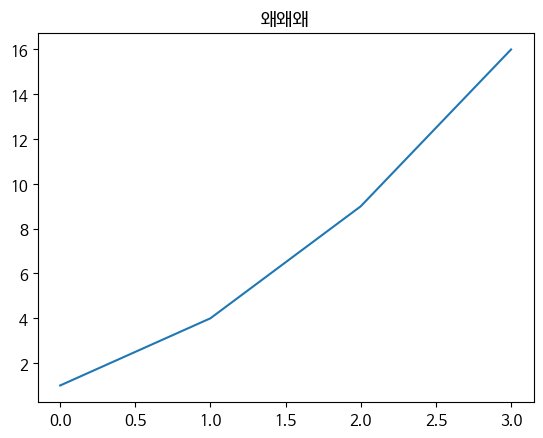

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,4,9,16])
plt.title('왜왜왜')
plt.show()

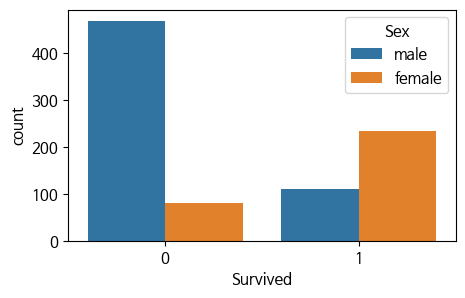

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df1 = df.copy()
plt.figure(figsize=(5,3))
sns.countplot(x='Survived', hue='Sex',  data=df1)
plt.show()

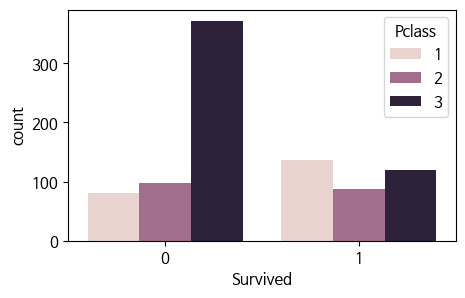

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived', hue='Pclass',  data=df1)
plt.show()

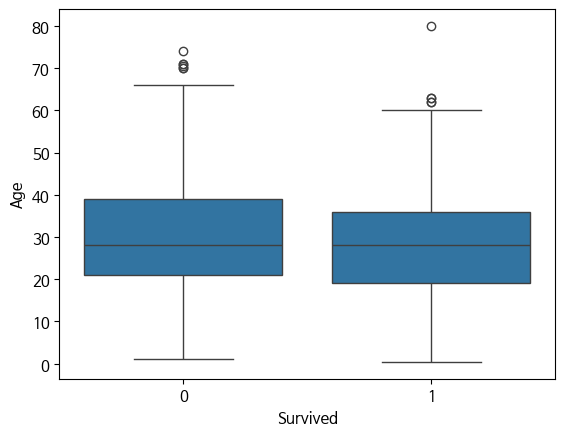

In [ ]:
# 연령 분포와 생존 box
sns.boxplot(x='Survived', y='Age', data=df1)
plt.show()

# 다변량 분석 pair plot
```
숫자형 변수간의 상관관계를
```

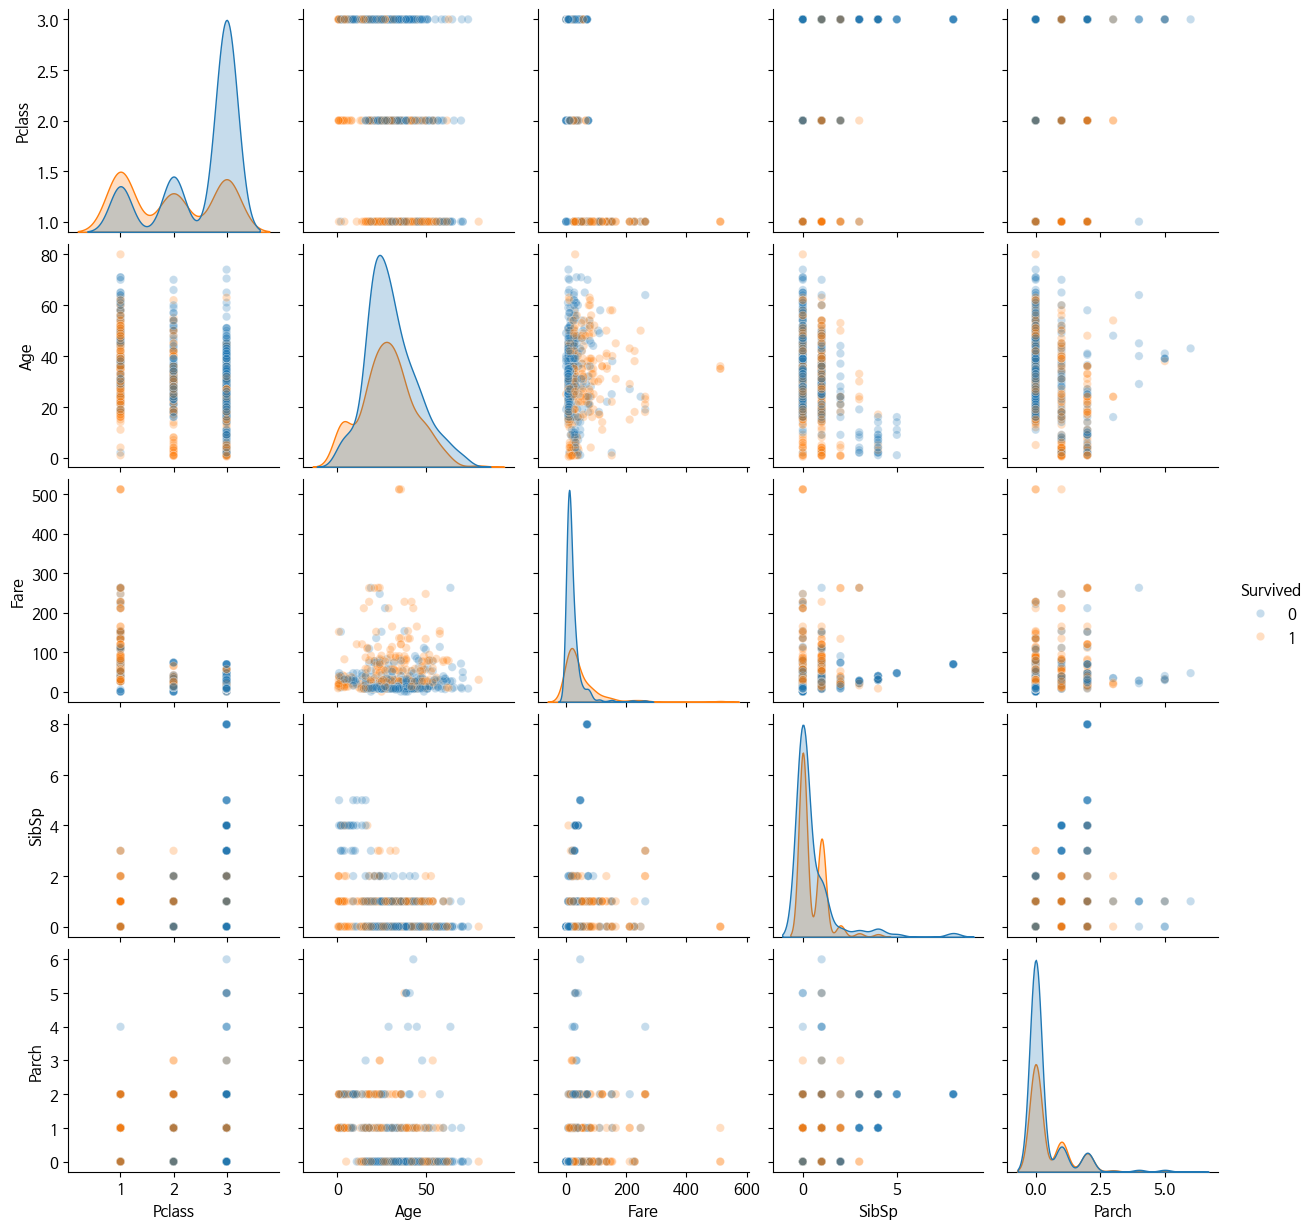

In [ ]:
# sns.pairplot(df1, hue='Survived',plot_kws = {'alpha' : 0.5})
# plt.show()
sns.pairplot(df1[['Survived','Pclass','Age','Fare','SibSp','Parch']], hue = "Survived", plot_kws={'alpha':0.25})
plt.show()

# 히트맵
```
상관지수를 통해 시각화
숫자형 변수간 상관계수
```

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


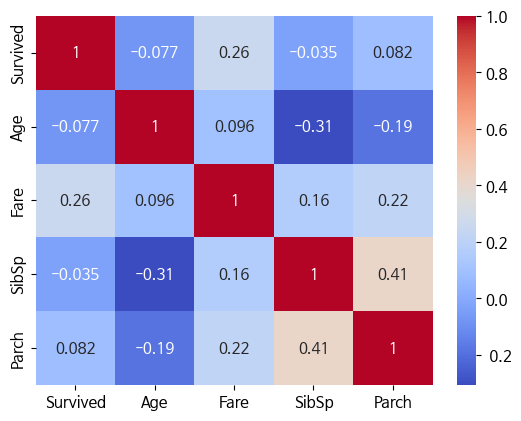

In [ ]:
corr = df1[['Survived', 'Age', 'Fare','SibSp','Parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# EDA
```
데이터 수집 - 데이터 분석(통계, 시각화등을 통해 데이터 특성을 파악) - 데이터 전처리(새로운특성 찾기) - 머신러닝(딥러닝)의 학습용 데이터로 제공
```

In [ ]:
# 데이터 분석
# info, describe ,isna 등을 이용해서
#      데이터의 종류(수치형,범주형), 결측치 존재여부 및 처리방안 정해

# 보조적인 방법으로 시각화를 동원해서 .전체 데이터의 모양을 파악
# 상관관계(범주형, 수치형)
# 최종목적은.. 데이터를 전처리, 새로운특성을 추가(피처엔지니어)

# 데이터 리포트 작성

# 타이타닉 데이터를 이용한 데이터분석(생존을 기준으로)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency

# 데이터 로드
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df1 = df.copy()

# 결측치 처리
# age : 중위수, Embarked: 최빈수, Cabin(0,1)->Has_Cabin
df1['Age'].fillna(df1['Age'].median(), inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)  # 최빈값
df1['Has_Cabin'] = df1['Cabin'].notna().astype(int)

# 피처엔지니어링
df1['Rich'] = df['Fare'] > 95
df1['Vip'] = (df1['Pclass'] == 1) & (df1['Rich'] == True) & (df1['Cabin'].notna())
df1['Family'] = df1['SibSp'] + df1['Parch'] + 1

# 변수 타입 분류
numeric_cols = ['Age','Fare','Family','SibSp','Parch']
categorical_cols = ['Survived','Pclass','Sex','Embarked','Has_Cabin', 'Rich','Vip']

<ipython-input-35-823d93ff450b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].median(), inplace=True)
<ipython-input-35-823d93ff450b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

               Age      Fare    Family     SibSp     Parch  Survived
Age       1.000000  0.096688 -0.245619 -0.233296 -0.172482 -0.064910
Fare      0.096688  1.000000  0.217138  0.159651  0.216225  0.257307
Family   -0.245619  0.217138  1.000000  0.890712  0.783111  0.016639
SibSp    -0.233296  0.159651  0.890712  1.000000  0.414838 -0.035322
Parch    -0.172482  0.216225  0.783111  0.414838  1.000000  0.081629
Survived -0.064910  0.257307  0.016639 -0.035322  0.081629  1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


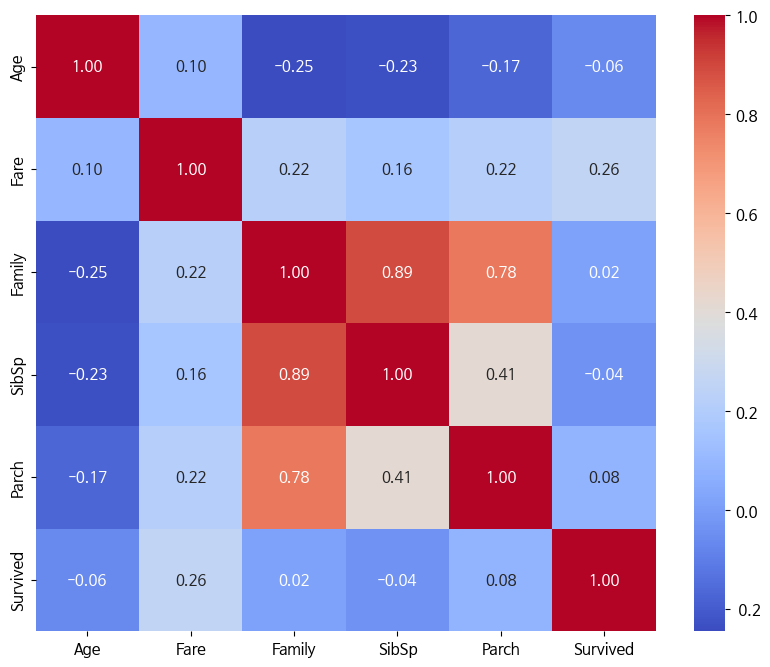

Age과의 상관계수 : -0.065, p-value : 0.053
Fare과의 상관계수 : 0.257, p-value : 0.000
Family과의 상관계수 : 0.017, p-value : 0.620
SibSp과의 상관계수 : -0.035, p-value : 0.292
Parch과의 상관계수 : 0.082, p-value : 0.015


In [ ]:
# 데이터분석

# 상관계수 행렬
corr_matrix =  df1[numeric_cols + ['Survived']].corr()
print(corr_matrix)
# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
# Survived 상관계수 및 p-value  (수치형과 범주형)
for col in numeric_cols:
  corr, p_value = pearsonr(df1[col],df1['Survived'])
  print(f'{col}과의 상관계수 : {corr:.3f}, p-value : {p_value:.3f}')

In [ ]:
# 카이제곱검증을 응용해서 정규화를 통해 0~1사의 값으로 조정  0이면 연관성이 없고 1이면 완벽한
import scipy.stats as stats
def cramers_v(x,y):
  c_table = pd.crosstab(x,y)
  chi2, _ , _ , _ = stats.chi2_contingency(c_table)  # 카이제곱검증, p-value, 자유도, 기대빈도
  n = c_table.sum().sum() # 교차표의 모든 값을 합산해서 총 관측치수 n   표본을 정규화
  return np.sqrt(chi2 / (n*(min(c_table.shape)-1)))

for col in categorical_cols[1:]:
  cramer_v = cramers_v(df1[col],df1['Survived'])
  print(f'{col}과의 Cramer\'s V : {cramer_v:.3f}')

Pclass과의 Cramer's V : 0.340
Sex과의 Cramer's V : 0.541
Embarked과의 Cramer's V : 0.171
Has_Cabin과의 Cramer's V : 0.314
Rich과의 Cramer's V : 0.177
Vip과의 Cramer's V : 0.151


In [ ]:
numeric_cols

['Age', 'Fare', 'Family', 'SibSp', 'Parch']

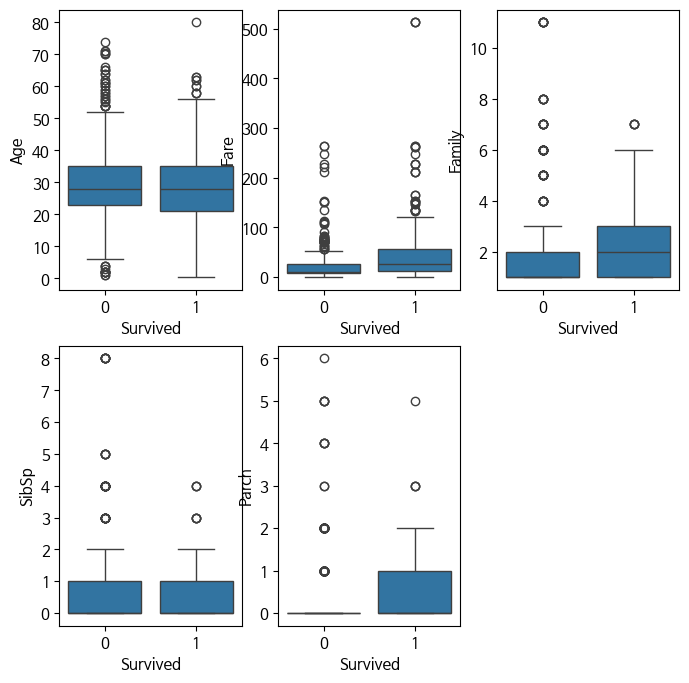

In [ ]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
df2 = df.copy()
for idx,col in enumerate(numeric_cols):
  plt.subplot(2,3,idx+1)
  sns.boxplot(data = df1, x = 'Survived', y = col)
plt.show()

와인품질 데이터 EDA

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

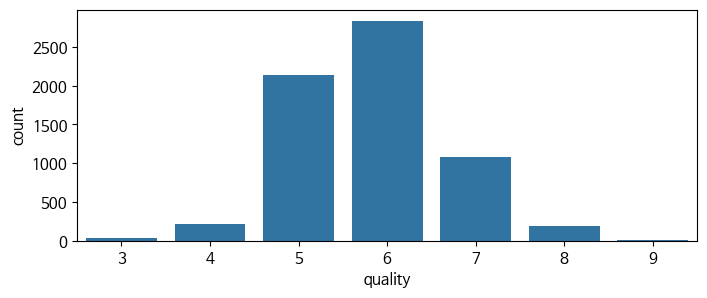

In [ ]:
plt.figure(figsize=(8, 3))
sns.countplot(x='quality', data=y)
plt.show()

In [ ]:
# info describe isna head()
# 결측치
# 이상치

In [ ]:
X['quality'] = y
df = X.copy()

<ipython-input-90-73ac3c301e64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['quality'] = y


In [ ]:
change_name = {
'quality' : '품질',
'fixed_acidity' : '산도',
'volatile_acidity' : '휘발성산',
'citric_acid':  '시트르산',
'residual_sugar' : '잔당(발효 후 와인 속에 남아있는 당분)',
'chlorides':  '염화물',
'free_sulfur_dioxide' : '독립 이산화황',
'total_sulfur_dioxide' : '총 이산화황',
'density' : '밀도',
'pH' : '수소이온농도',
'sulphates':  '황산염',
'alcohol':  '도수'
}
df.rename(columns=change_name, inplace=True)
df.head()

,산도,휘발성산,시트르산,잔당(발효 후 와인 속에 남아있는 당분),염화물,독립 이산화황,총 이산화황,밀도,수소이온농도,황산염,도수,품질
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


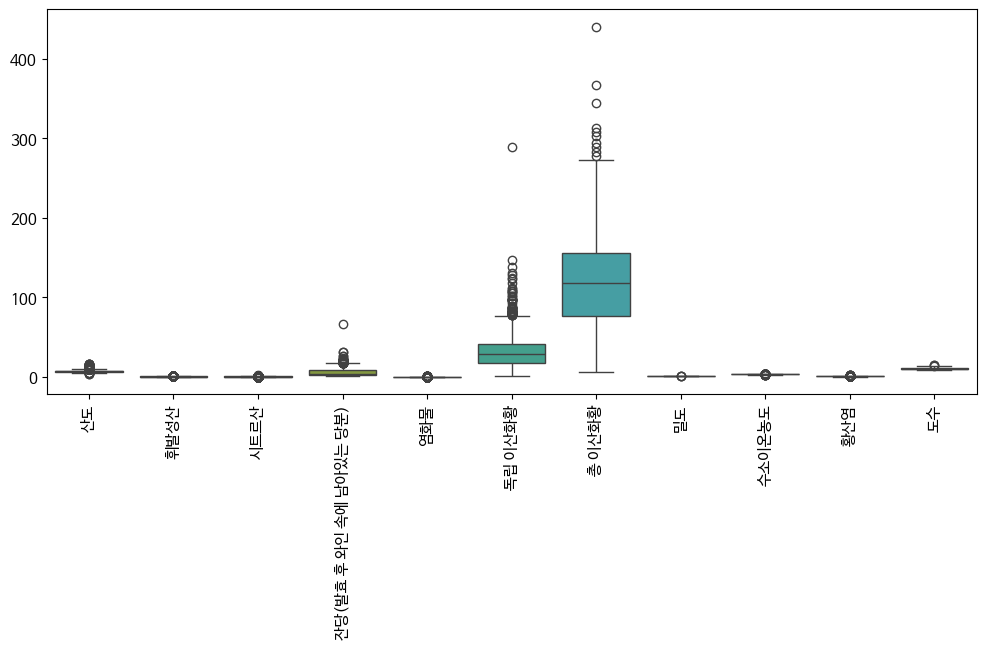

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# 결측치
df.isna().sum()
# 이상치 box
plt.figure(figsize=(12,5))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


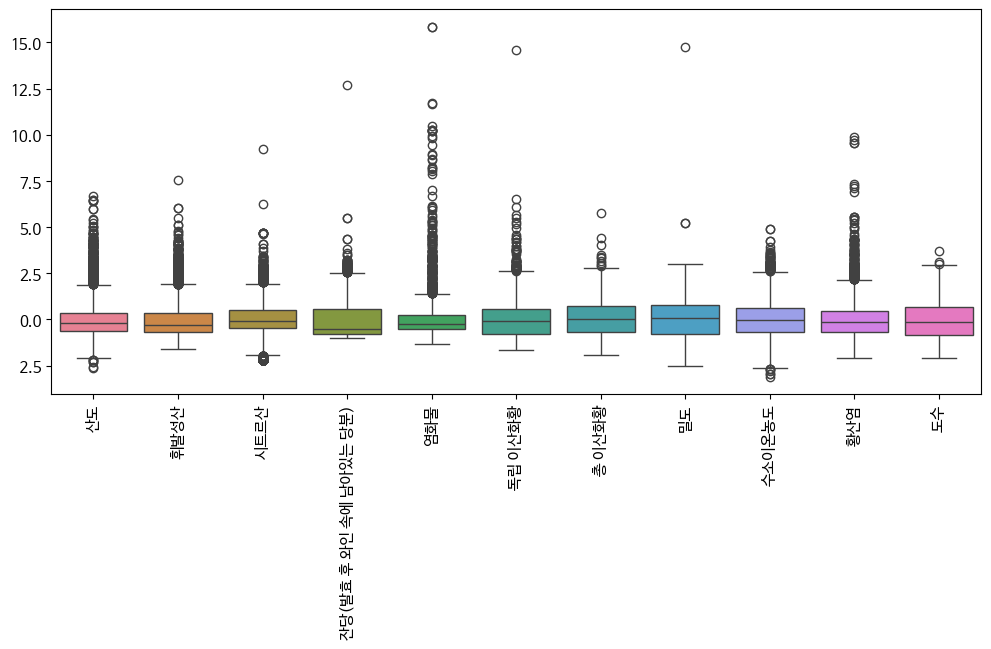

In [ ]:
# 스케일링...평균0 표준편차가 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns[:-1])
# df_scaled_df.head()
# 이상치 box
plt.figure(figsize=(12,5))
sns.boxplot(data=df_scaled_df)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


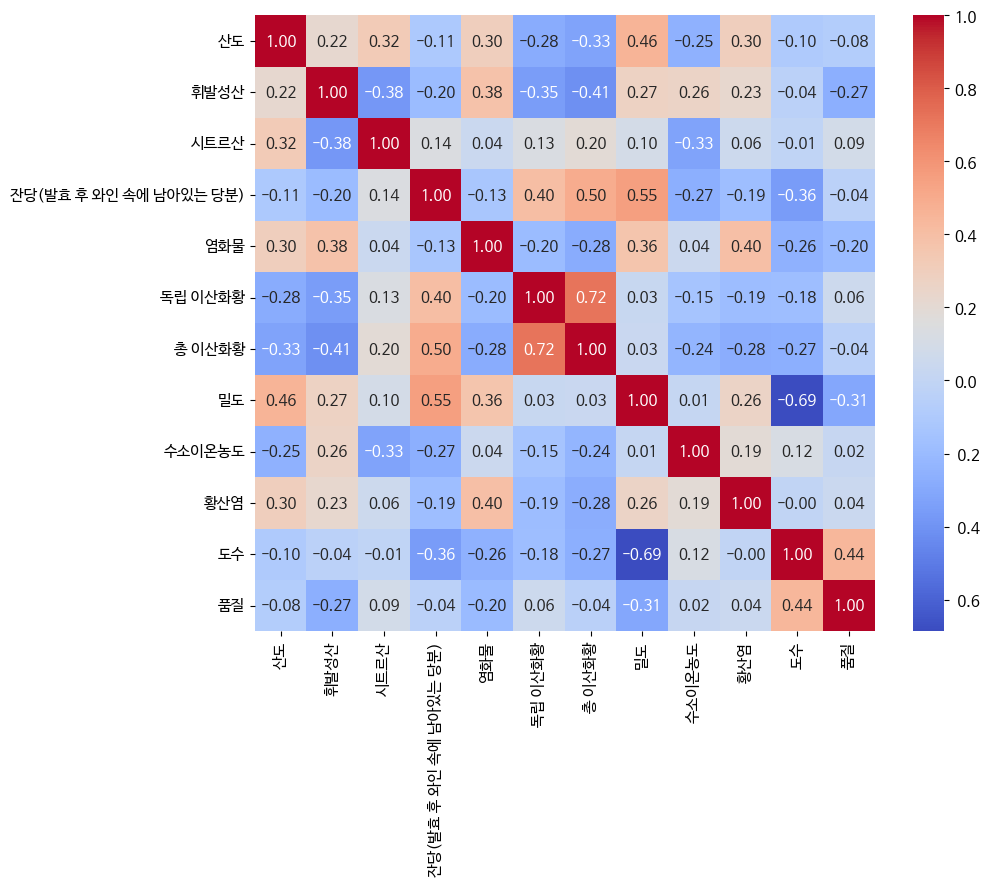

In [ ]:
# 상관관계 분석
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

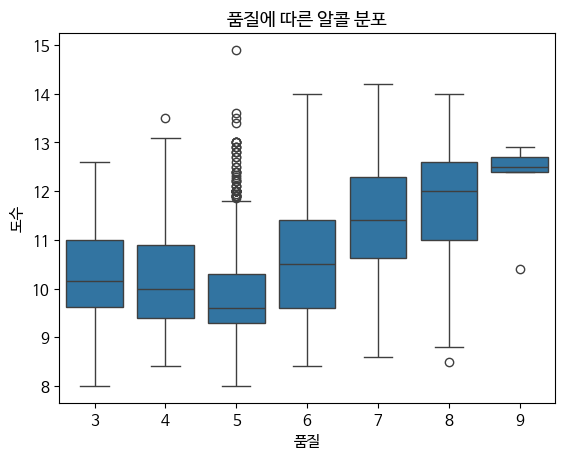

In [ ]:
# 품질 VS 도수
sns.boxplot(x='품질',y='도수',data=df)
plt.title("품질에 따른 알콜 분포")
plt.show()

In [ ]:
corr_matrix.iloc[:, -1].sort_values(ascending=False)  # 내림차순


,품질
품질,1.000000
도수,0.444319
시트르산,0.085532
독립 이산화황,0.055463
황산염,0.038485
수소이온농도,0.019506
잔당(발효 후 와인 속에 남아있는 당분),-0.036980
총 이산화황,-0.041385
산도,-0.076743
염화물,-0.200666
